In [1]:
#Data Capstone Project Emergency
#911 Calls

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import cufflinks as cf
cf.go_offline()

In [5]:
import plotly.express as px

In [6]:
import plotly.graph_objects as go

In [7]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [8]:
from pandas_datareader import data, wb

In [9]:
import datetime

In [10]:
import yfinance as yf

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv('911.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [70]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [71]:
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [72]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [73]:
df['title'].nunique()

148

In [74]:
x = df['title'].iloc[0]

In [75]:
x.split(':')[0]

'EMS'

In [76]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [77]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [78]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

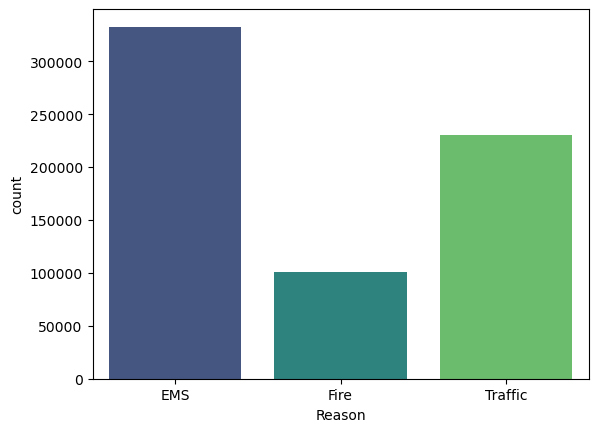

In [79]:
sns.countplot(x='Reason',data=df,palette='viridis',hue='Reason',legend=False)

In [80]:
df['timeStamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 663522 entries, 0 to 663521
Series name: timeStamp
Non-Null Count   Dtype 
--------------   ----- 
663522 non-null  object
dtypes: object(1)
memory usage: 5.1+ MB


In [81]:
type(df['timeStamp'].iloc[0])

str

In [82]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [83]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [84]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [85]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [86]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [87]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [88]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [89]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur


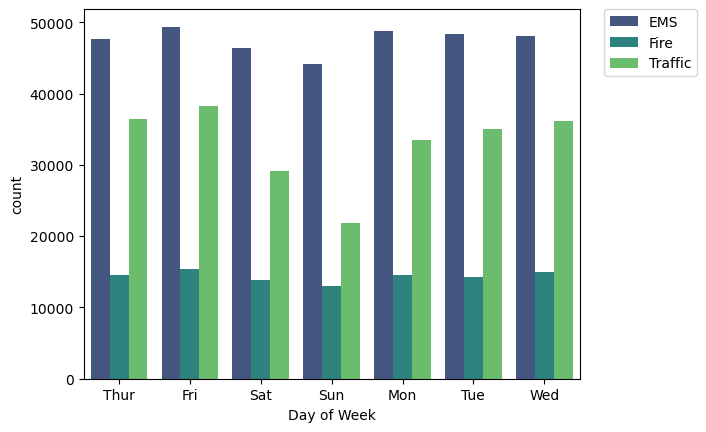

In [90]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

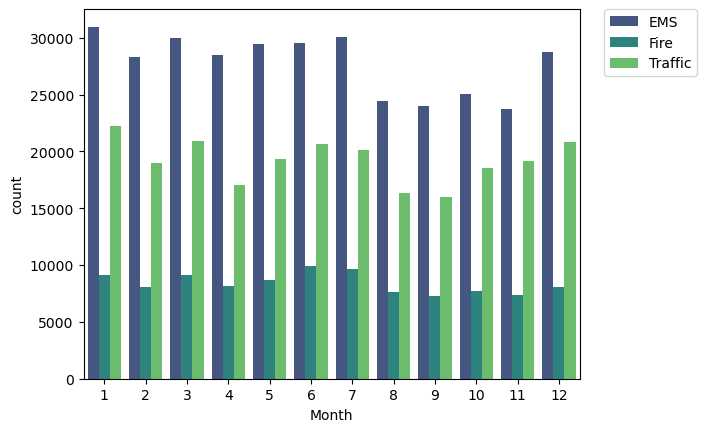

In [91]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [92]:
byMonth = df.groupby('Month').count()

In [93]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<Axes: xlabel='Month'>

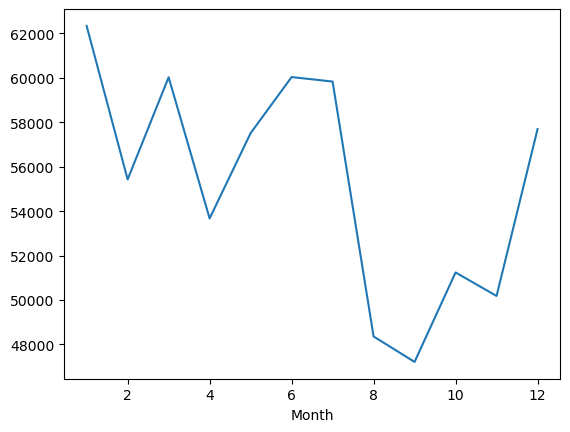

In [94]:
byMonth['lat'].plot()

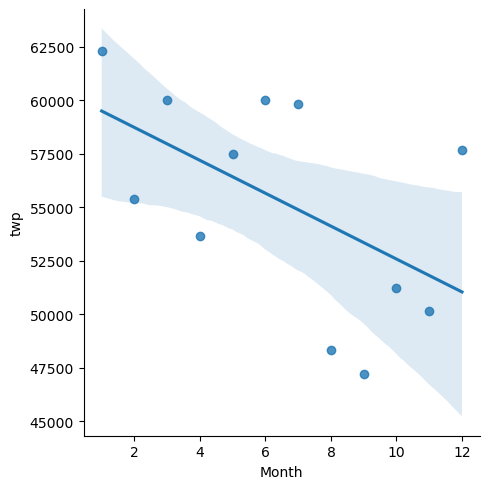

In [95]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [96]:
t = df['timeStamp'].iloc[0]

In [97]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [98]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thur,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thur,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thur,2015-12-10


In [99]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


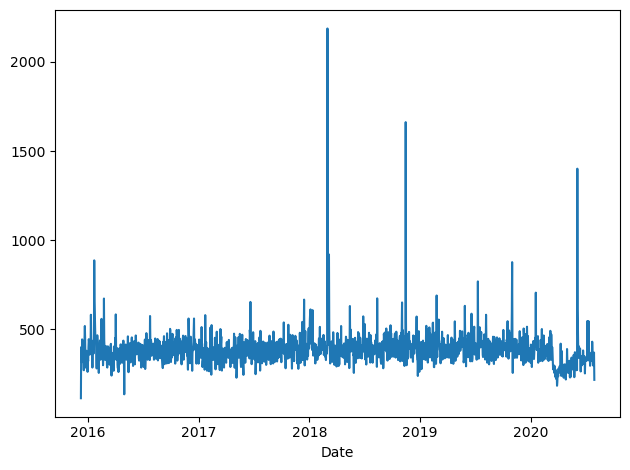

In [100]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

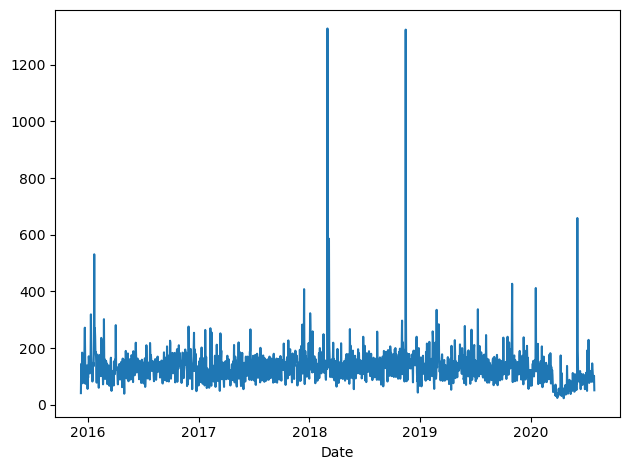

In [101]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

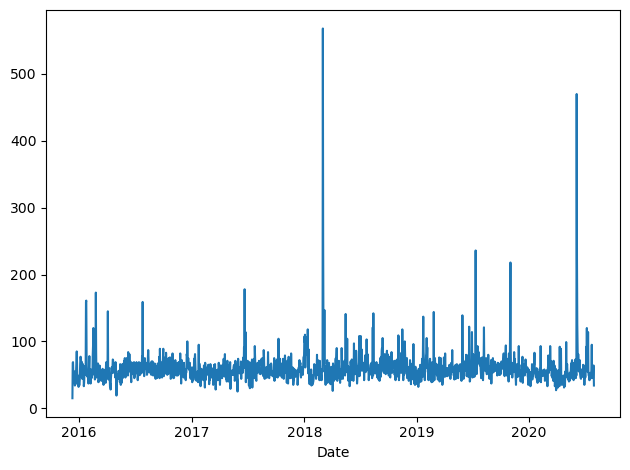

In [102]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

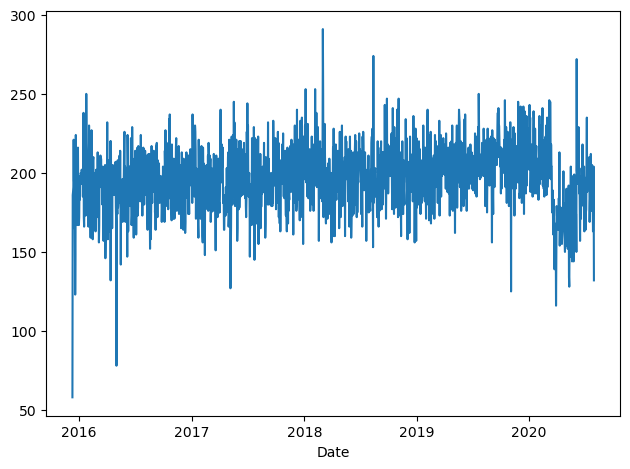

In [103]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [104]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<Axes: xlabel='Hour', ylabel='Day of Week'>

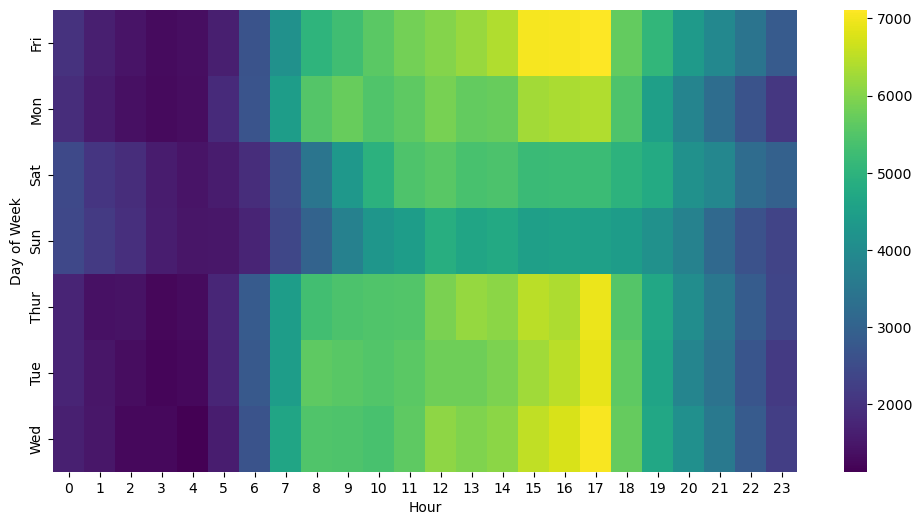

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')


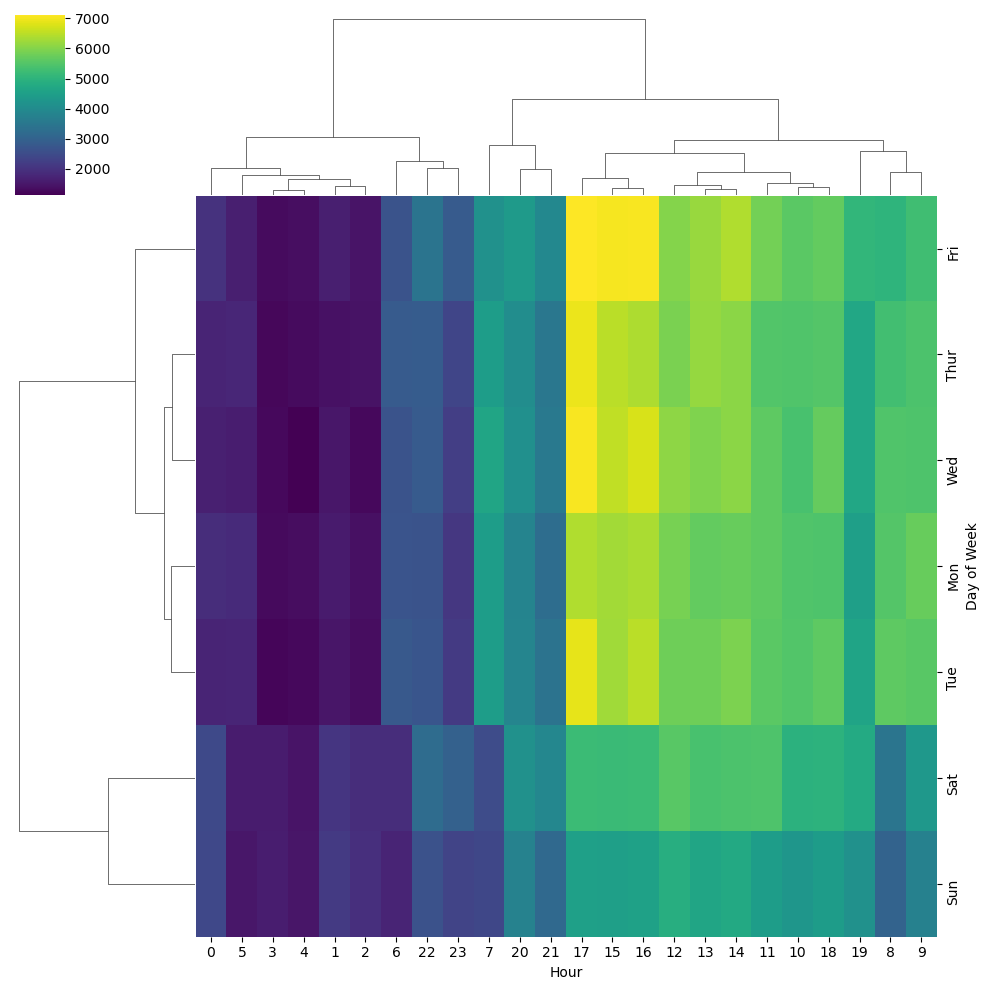

In [106]:
sns.clustermap(dayHour,cmap='viridis')

In [12]:
#Finance Data
#All Banks

In [13]:
start = '2006-01-01'

In [14]:
end = '2016-01-01'

In [15]:
BAC = yf.download('BAC', start=start, end=end)
# CitiGroup
C = yf.download('C', start=start, end=end)
# Goldman Sachs
GS = yf.download('GS', start=start, end=end)
# JPMorgan Chase
JPM = yf.download('JPM', start=start, end=end)
# Morgan Stanley
MS = yf.download('MS', start=start, end=end)
# Wells Fargo
WFC = yf.download('WFC', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [111]:
BAC.head()

Price,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC
Date,,,,,
2006-01-03,30.660290,30.725413,30.054638,30.556089,16296700
2006-01-04,30.334673,30.764490,30.250011,30.608192,17757900
2006-01-05,30.373739,30.497476,30.165343,30.334667,14970700
2006-01-06,30.328148,30.549569,30.184875,30.477932,12599800
2006-01-09,30.347698,30.588658,30.191402,30.425849,15619400


In [112]:
C.head()

Price,Close,High,Low,Open,Volume
Ticker,C,C,C,C,C
Date,,,,,
2006-01-03,317.449738,318.029374,309.850015,315.582011,1537600
2006-01-04,311.588806,316.225936,311.395601,314.680232,1870960
2006-01-05,313.134460,314.164916,311.717555,311.975168,1143160
2006-01-06,313.134460,314.937777,310.429466,314.808961,1370210
2006-01-09,311.653351,313.907508,311.073714,313.005849,1680740


In [113]:
JPM.head()

Price,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM
Date,,,,,
2006-01-03,23.861788,23.962722,23.333373,23.648049,12838600
2006-01-04,23.724054,24.035425,23.604296,23.819861,13491500
2006-01-05,23.795931,23.837846,23.652220,23.718087,8109400
2006-01-06,23.963581,24.095316,23.682149,23.903701,7966900
2006-01-09,24.352787,24.382728,23.879745,23.879745,16575200


In [114]:
GS.head()

Price,Close,High,Low,Open,Volume
Ticker,GS,GS,GS,GS,GS
Date,,,,,
2006-01-03,93.850296,94.265407,90.471196,92.269983,6188700
2006-01-04,92.554024,93.879455,92.036963,92.743372,4861600
2006-01-05,92.517624,92.721535,91.476218,91.760237,3717400
2006-01-06,93.828491,94.127079,92.699698,92.699698,4319600
2006-01-09,94.957298,95.124794,93.216767,93.580895,4723500


In [115]:
MS.head()

Price,Close,High,Low,Open,Volume
Ticker,MS,MS,MS,MS,MS
Date,,,,,
2006-01-03,31.522440,31.619748,30.673697,30.906153,5377000
2006-01-04,31.544064,32.046823,31.544064,31.733275,7977800
2006-01-05,31.630558,31.673807,31.365665,31.652183,5778000
2006-01-06,31.663004,31.814372,31.381891,31.771125,6889800
2006-01-09,31.998159,32.052221,31.690017,31.695424,4144500


In [116]:
WFC.head()

Price,Close,High,Low,Open,Volume
Ticker,WFC,WFC,WFC,WFC,WFC
Date,,,,,
2006-01-03,18.469473,18.512897,18.061292,18.295779,11016400
2006-01-04,18.255247,18.423151,18.159715,18.411571,10870000
2006-01-05,18.234983,18.269722,18.127871,18.237878,10158000
2006-01-06,18.342094,18.397097,18.171295,18.284196,8403800
2006-01-09,18.339201,18.426049,18.269724,18.339201,5619600


In [16]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [17]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [119]:
bank_stocks.head()

BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  30.660290  30.725413  30.054638  30.556089  16296700  317.449738   
2006-01-04  30.334673  30.764490  30.250011  30.608192  17757900  311.588806   
2006-01-05  30.373739  30.497476  30.165343  30.334667  14970700  313.134460   
2006-01-06  30.328148  30.549569  30.184875  30.477932  12599800  313.134460   
2006-01-09  30.347698  30.588658  30.191402  30.425849  15619400  311.653351   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  318.029374  309.850015  315.582011  1537600  ...  31.522440   
2006-01-04  316.225936  311.395601  314.680232  1870960  ...  31.544064   
2006-01-05  314.164916  311.717555  311.975168  1143160  ...  31.630558   
2006-01-06  314.937777  310.429466  314.808961  1370210  ...  31.663004   
2006-01-09  313.907508  311.073714  313.005849  1680740  ...  31.998159   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  31.619748  30.673697  30.906153  5377000  18.469473  18.512897   
2006-01-04  32.046823  31.544064  31.733275  7977800  18.255247  18.423151   
2006-01-05  31.673807  31.365665  31.652183  5778000  18.234983  18.269722   
2006-01-06  31.814372  31.381891  31.771125  6889800  18.342094  18.397097   
2006-01-09  32.052221  31.690017  31.695424  4144500  18.339201  18.426049   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.061292  18.295779  11016400  
2006-01-04  18.159715  18.411571  10870000  
2006-01-05  18.127871  18.237878  10158000  
2006-01-06  18.171295  18.284196   8403800  
2006-01-09  18.269724  18.339201   5619600  

[5 rows x 30 columns]

In [120]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

ValueError: Length of names must match number of levels in MultiIndex.

In [121]:
print(f"Your columns have {bank_stocks.columns.nlevels} levels")

Your columns have 3 levels


In [122]:
print(bank_stocks.columns)

MultiIndex([('BAC',  'Close', 'BAC'),
            ('BAC',   'High', 'BAC'),
            ('BAC',    'Low', 'BAC'),
            ('BAC',   'Open', 'BAC'),
            ('BAC', 'Volume', 'BAC'),
            (  'C',  'Close',   'C'),
            (  'C',   'High',   'C'),
            (  'C',    'Low',   'C'),
            (  'C',   'Open',   'C'),
            (  'C', 'Volume',   'C'),
            ( 'GS',  'Close',  'GS'),
            ( 'GS',   'High',  'GS'),
            ( 'GS',    'Low',  'GS'),
            ( 'GS',   'Open',  'GS'),
            ( 'GS', 'Volume',  'GS'),
            ('JPM',  'Close', 'JPM'),
            ('JPM',   'High', 'JPM'),
            ('JPM',    'Low', 'JPM'),
            ('JPM',   'Open', 'JPM'),
            ('JPM', 'Volume', 'JPM'),
            ( 'MS',  'Close',  'MS'),
            ( 'MS',   'High',  'MS'),
            ( 'MS',    'Low',  'MS'),
            ( 'MS',   'Open',  'MS'),
            ( 'MS', 'Volume',  'MS'),
            ('WFC',  'Close', 'WFC'),
            

In [18]:
bank_stocks.columns = bank_stocks.columns.droplevel(2)

In [19]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [125]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   30.660290  30.725413  30.054638  30.556089  16296700  317.449738   
2006-01-04   30.334673  30.764490  30.250011  30.608192  17757900  311.588806   
2006-01-05   30.373739  30.497476  30.165343  30.334667  14970700  313.134460   
2006-01-06   30.328148  30.549569  30.184875  30.477932  12599800  313.134460   
2006-01-09   30.347698  30.588658  30.191402  30.425849  15619400  311.653351   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   318.029374  309.850015  315.582011  1537600  ...  31.522440   
2006-01-04   316.225936  311.395601  314.680232  1870960  ...  31.544064   
2006-01-05   314.164916  311.717555  311.975168  1143160  ...  31.630558   
2006-01-06   314.937777  310.429466  314.808961  1370210  ...  31.663004   
2006-01-09   313.907508  311.073714  313.005849  1680740  ...  31.998159   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   31.619748  30.673697  30.906153  5377000  18.469473  18.512897   
2006-01-04   32.046823  31.544064  31.733275  7977800  18.255247  18.423151   
2006-01-05   31.673807  31.365665  31.652183  5778000  18.234983  18.269722   
2006-01-06   31.814372  31.381891  31.771125  6889800  18.342094  18.397097   
2006-01-09   32.052221  31.690017  31.695424  4144500  18.339201  18.426049   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.061292  18.295779  11016400  
2006-01-04   18.159715  18.411571  10870000  
2006-01-05   18.127871  18.237878  10158000  
2006-01-06   18.171295  18.284196   8403800  
2006-01-09   18.269724  18.339201   5619600  

[5 rows x 30 columns]

In [20]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 37.0787239074707
C 378.4677429199219
GS 183.25880432128906
JPM 53.088592529296875
MS 49.4149284362793
WFC 43.54050827026367


In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     37.078724
C      378.467743
GS     183.258804
JPM     53.088593
MS      49.414928
WFC     43.540508
dtype: float64

In [22]:
returns = pd.DataFrame()

In [23]:
for tick in tickers:
    returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()

In [130]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018463,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003030,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007045,0.001026,0.005874
2006-01-09,0.000645,-0.004730,0.012031,0.016242,0.010585,-0.000158


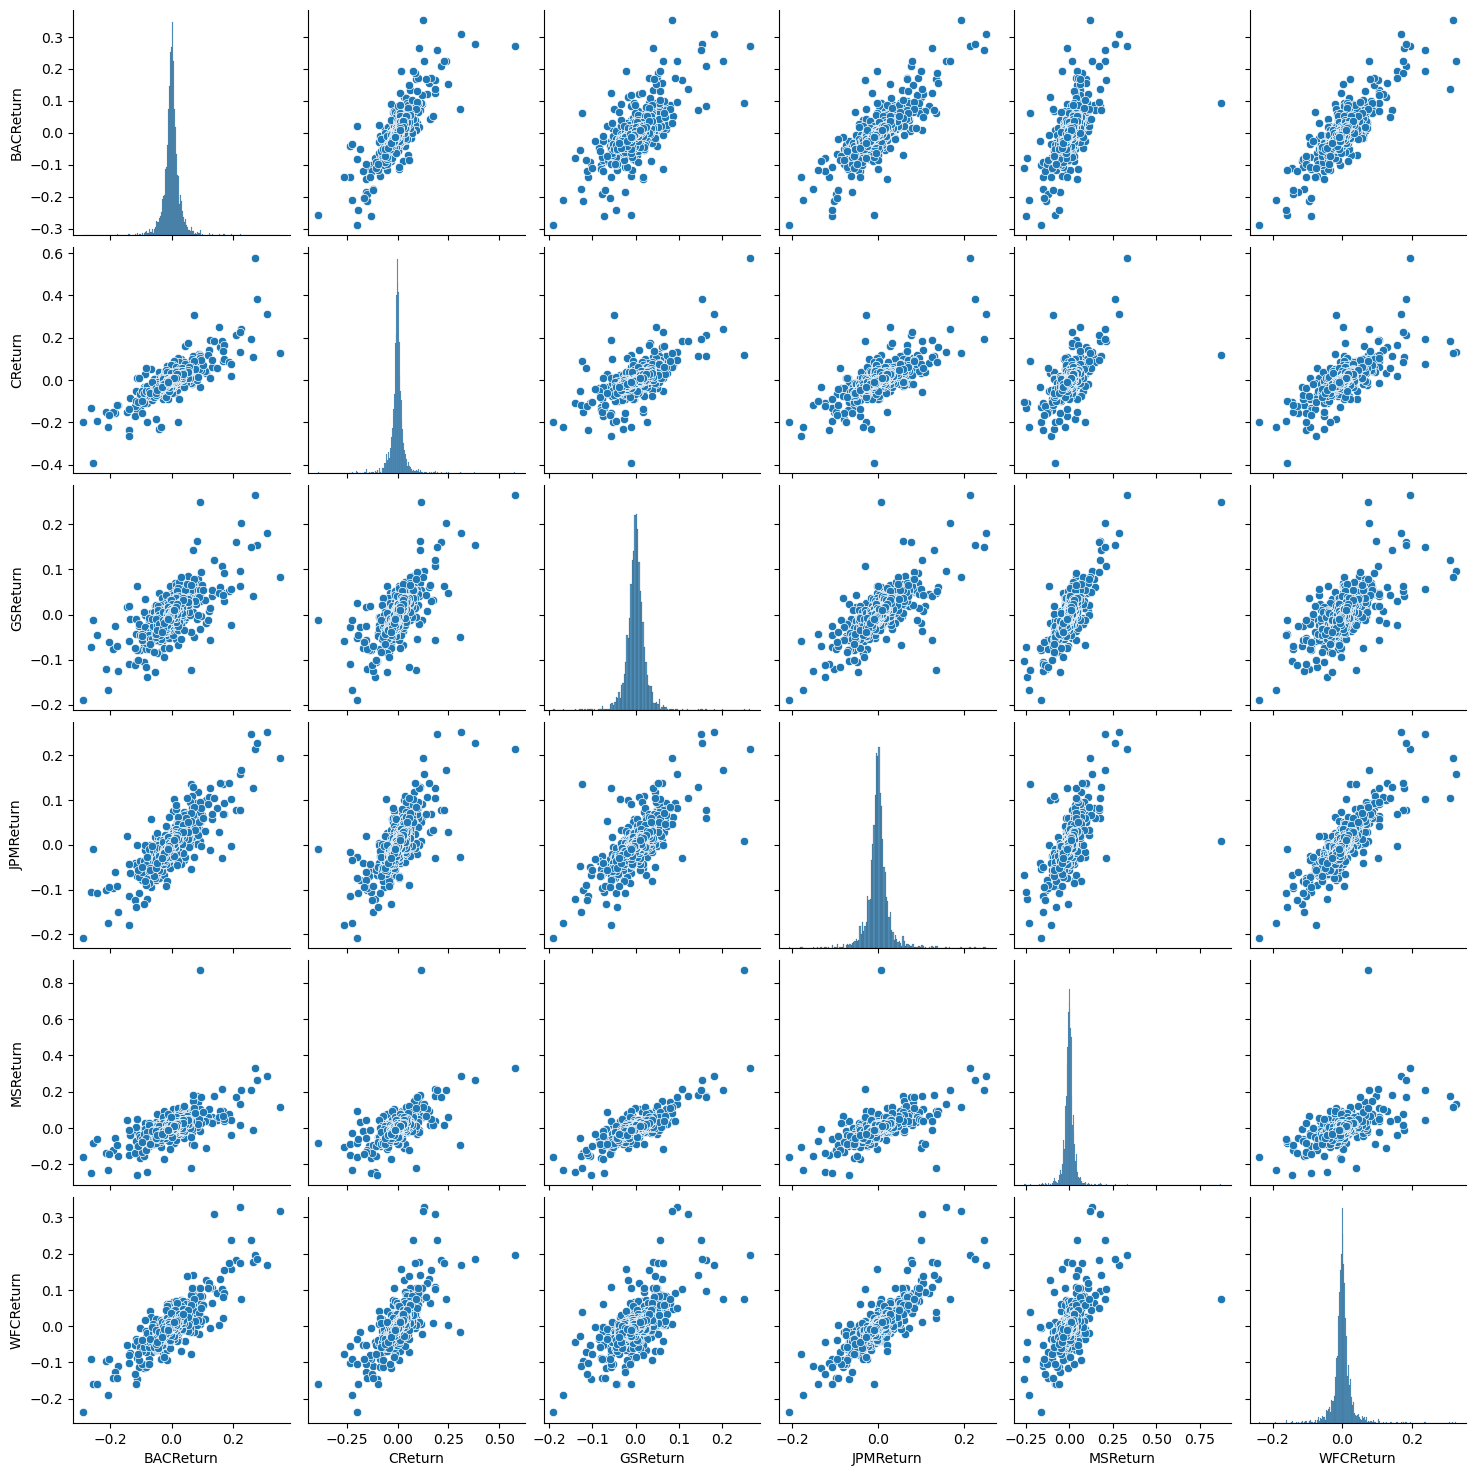

In [131]:
sns.pairplot(returns[1:])

In [132]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [133]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [134]:
returns.std()

BACReturn    0.036659
CReturn      0.038672
GSReturn     0.025386
JPMReturn    0.027675
MSReturn     0.037717
WFCReturn    0.030195
dtype: float64

In [ ]:
returns.loc['2015-01-01':'2015-12-31'].std()

<Axes: xlabel='MSReturn', ylabel='Count'>

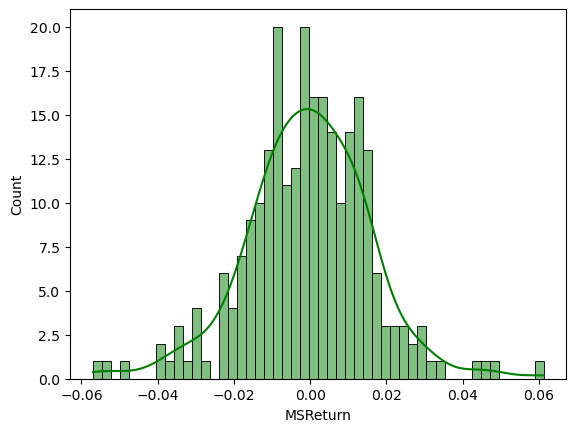

In [145]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color='green',bins=50,kde=True)

<Axes: xlabel='CReturn', ylabel='Count'>

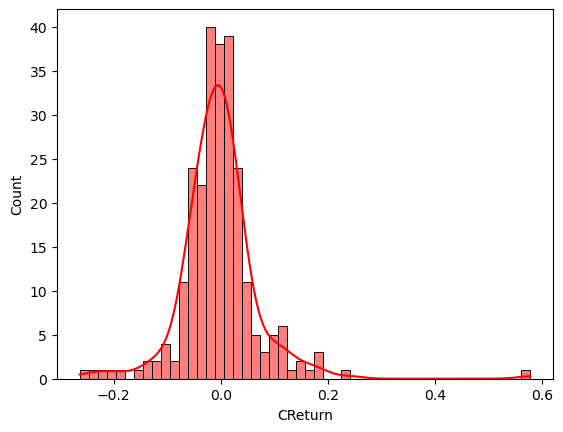

In [149]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=50,kde=True)

In [ ]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

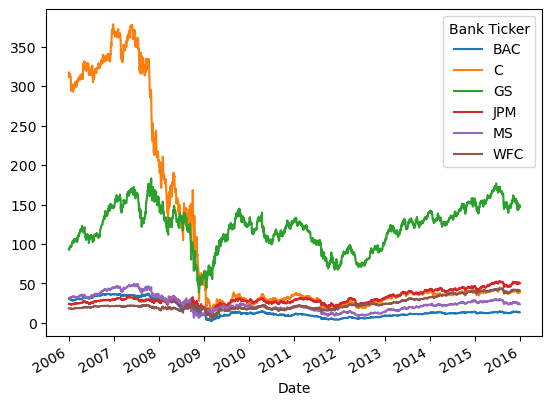

In [151]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

<Figure size 1200x400 with 0 Axes>

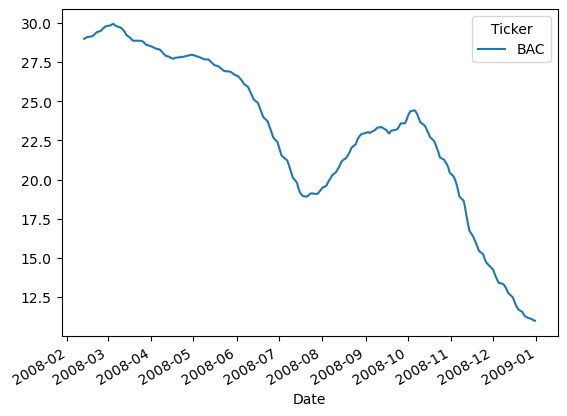

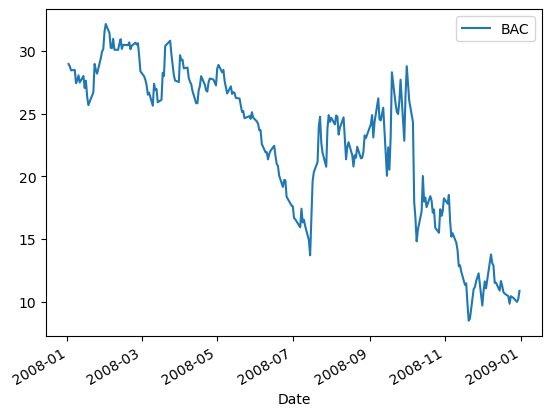

In [153]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

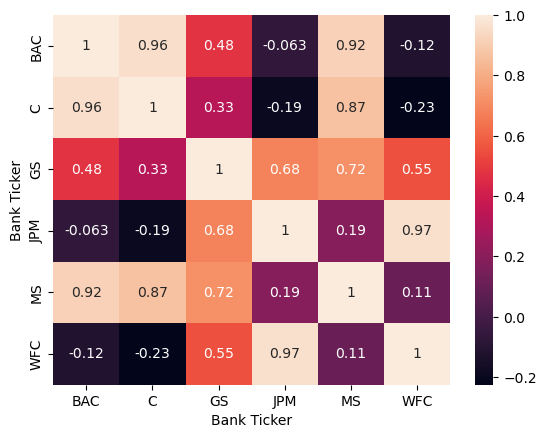

In [155]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

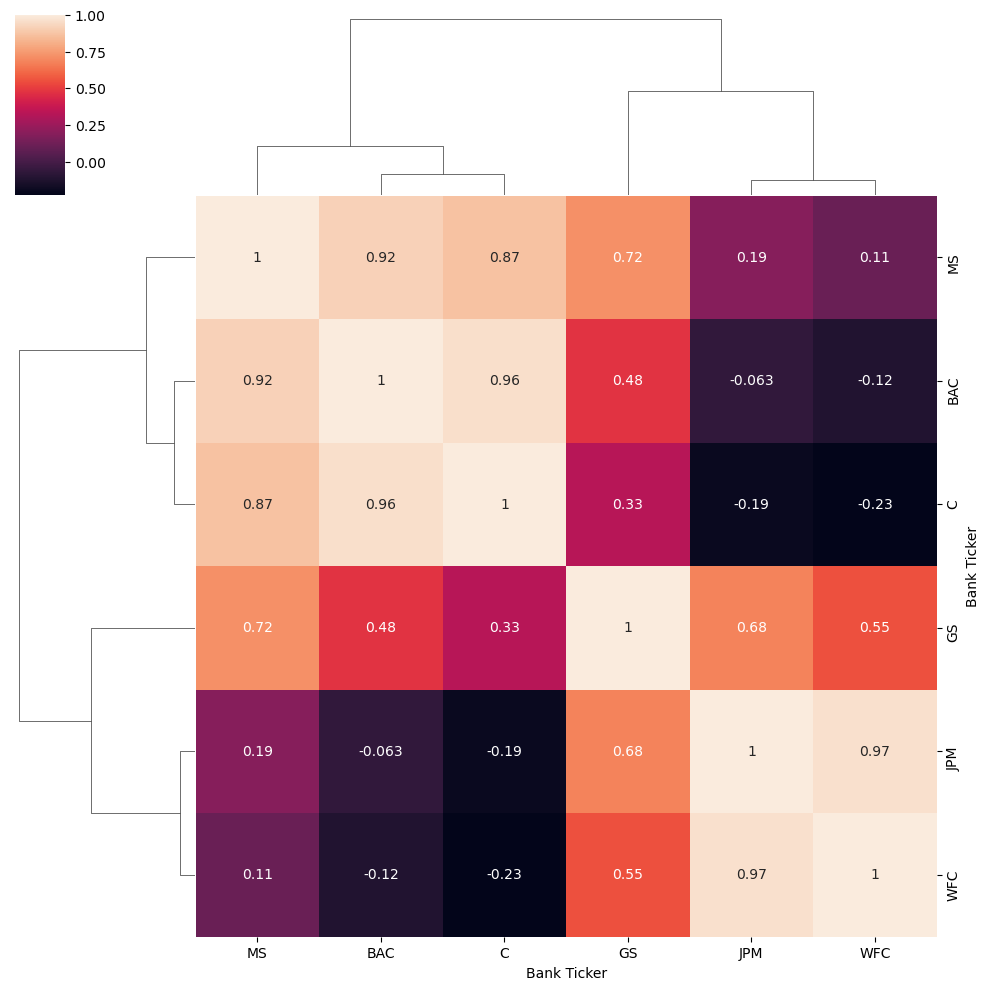

In [156]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [157]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

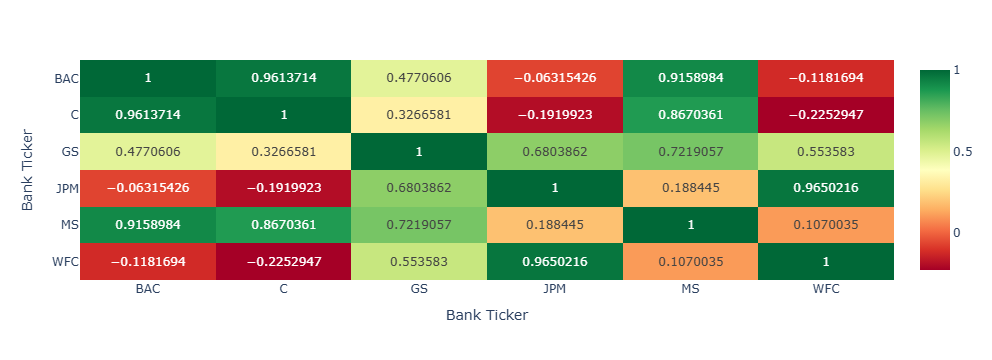

In [175]:

fig = px.imshow(close_corr, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdYlGn')
fig.show()

In [24]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

In [25]:
print(f"Dataframe shape: {bac15.shape}")
print(bac15.head())

Dataframe shape: (252, 4)
Price            Open       High        Low      Close
Ticker            BAC        BAC        BAC        BAC
Date                                                  
2015-01-02  14.275062  14.306802  14.029077  14.203647
2015-01-05  14.116360  14.132229  13.719611  13.791024
2015-01-06  13.822761  13.838631  13.314922  13.378402
2015-01-07  13.600584  13.632325  13.386340  13.441885
2015-01-08  13.616456  13.759287  13.568847  13.719612


In [26]:
bac15.head()

Price,Open,High,Low,Close
Ticker,BAC,BAC,BAC,BAC
Date,,,,
2015-01-02,14.275062,14.306802,14.029077,14.203647
2015-01-05,14.116360,14.132229,13.719611,13.791024
2015-01-06,13.822761,13.838631,13.314922,13.378402
2015-01-07,13.600584,13.632325,13.386340,13.441885
2015-01-08,13.616456,13.759287,13.568847,13.719612


In [28]:
fig = go.Figure(data=[go.Candlestick(x=bac15.index,
                open=bac15['Open']['BAC'],
                high=bac15['High']['BAC'],
                low=bac15['Low']['BAC'],
                close=bac15['Close']['BAC'])])

fig.update_layout(
    title='BAC Candlestick Chart 2015',
    yaxis_title='Stock Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False,
    template='plotly_white'
)

fig.show()

In [30]:
ms15 = MS.loc['2015-01-01':'2016-01-01']

sma13 = ms15['Close']['MS'].rolling(window=13).mean()
sma21 = ms15['Close']['MS'].rolling(window=21).mean()
sma55 = ms15['Close']['MS'].rolling(window=55).mean()

fig = go.Figure()

fig.add_trace(go.Candlestick(x=ms15.index,
                open=ms15['Open']['MS'],
                high=ms15['High']['MS'],
                low=ms15['Low']['MS'],
                close=ms15['Close']['MS'], 
                name='Market Data'))

fig.add_trace(go.Scatter(x=ms15.index, y=sma13, name='SMA 13', line=dict(color='blue', width=1)))

fig.add_trace(go.Scatter(x=ms15.index, y=sma21, name='SMA 21', line=dict(color='orange', width=1)))

fig.add_trace(go.Scatter(x=ms15.index, y=sma55, name='SMA 55', line=dict(color='green', width=1)))

fig.update_layout(title='MS SMA Study (13, 21, 55)',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False,
                  template='plotly_white')

fig.show()

In [40]:
fig = px.line(boll_df, 
              title='Bollinger Bands for Bank of America (2015)',
              color_discrete_map={
                  'Close': '#1f77b4', 
                  'SMA': '#ff7f0e', 
                  'Upper Band': '#bcbd22', 
                  'Lower Band': '#bcbd22'
              })

fig.update_traces(line=dict(width=1), selector=dict(name='Upper Band'))
fig.update_traces(line=dict(width=1), selector=dict(name='Lower Band'))

fig.show()